### Практикум №2

#### Metroplolis - Hastings algorithm

The main aim is to realise Metropolis algorithm and study to apply it. The main goal is to apply this algorithm for bivariate normal distribution. We are going to thrash easy examples out before real Bayesian task 

$$ p(\theta | x ) \cong Likelihood * prior$$

In [158]:
from datetime import datetime
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

#### 1.1 Beta distribution

Without bayesian analysis, let's try it out.

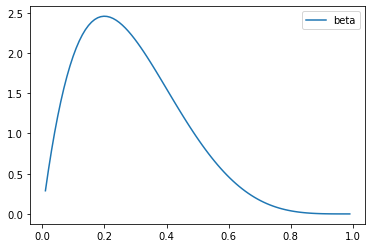

In [7]:
func = sps.beta(2,5)
x = np.linspace(.01,.99,100)
y = func.pdf(x)
plt.plot(x,y,label = 'beta');
plt.legend()
plt.show();

#### 1.2. Metropolis without hastings

In [28]:
def Metropolis_1(func, sample_size):
    
    trace = np.zeros(sample_size)
    delta = np.random.normal(0,0.5,sample_size)
    old_x = 0.5 # func.mean()
    old_proba = func.pdf(old_x)
    
    for i in range(sample_size):
        
        u = sps.uniform(loc = 0,scale = 1).rvs(1) # uniformly random variable
        new_x = old_x + delta[i] # it's like proposal
        
        new_proba = func.pdf(new_x)
        
        A = float(new_proba / old_proba) 
        if u < A:
            trace[i] = new_x
            old_x = new_x
            old_proba = new_proba
        else:
            trace[i] = old_x
    return trace

In [29]:
def Metropolis_2(func, sample_size):
    
    trace = np.zeros(sample_size)
    old_x = 0.5 # func.mean()
    old_proba = func.pdf(old_x)
    
    for i in range(sample_size):
        u = sps.uniform(loc = 0, scale = 1).rvs(1)
        new_x = sps.norm(old_x,1).rvs(1)
        new_proba = func.pdf(new_x)
        A = float(new_proba/ old_proba)
        
        if u < A:
            trace[i] = new_x
            old_proba = new_proba
            old_x = new_x
        else:
            trace[i] = old_x
            
    return trace

In [30]:
m_1 = Metropolis_1(sps.beta(2,5),1000)
m_2 = Metropolis_2(sps.beta(2,5),1000)

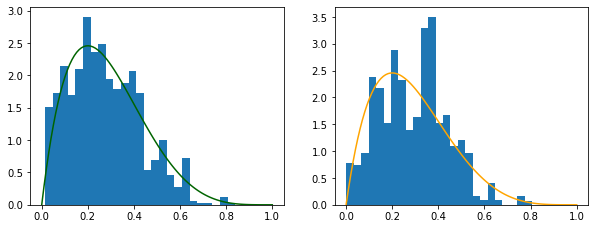

In [47]:
fig = plt.figure(figsize=(10,8))
x = np.linspace(0,1,100)
ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_1.hist(m_1[m_1 > 0],bins=25,density = True);
ax_1.plot(x,sps.beta(2,5).pdf(x),color='darkgreen');
ax_2.hist(m_2[m_2 > 0],bins=25, density = True);
ax_2.plot(x,sps.beta(2,5).pdf(x),color='orange');

#### 2. Normal proposal for Metropolis algorithm

$$ p(x) = 6x(1-x) $$
$$ x_{new} = \mathcal{N}(x_{old},0.6)$$

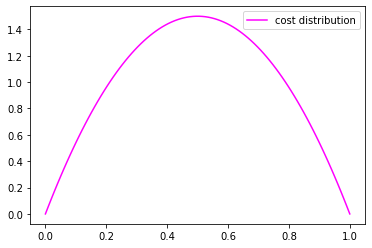

In [4]:
p = lambda x: 6*x*(1-x)
x = np.linspace(0,1,100)
plt.plot(x,p(x),color = 'magenta', label='cost distribution')
plt.legend()
plt.show()

In [8]:
def Metropolis_3_own(sample_size,p):
    trace = np.zeros(sample_size)
    old_x = 0.5 # func.mean
    old_proba = p(old_x)
    for i in range(sample_size):
        u = sps.uniform(0,1).rvs(1)
        new_x = sps.norm(old_x,np.sqrt(0.6)).rvs(1)
        new_proba = p(new_x)
        A = min(1, new_proba/old_proba)
        if u < A:
            trace[i] = new_x
            old_proba = new_proba
            old_x = new_x
        else:
            trace[i] = old_x
    return trace

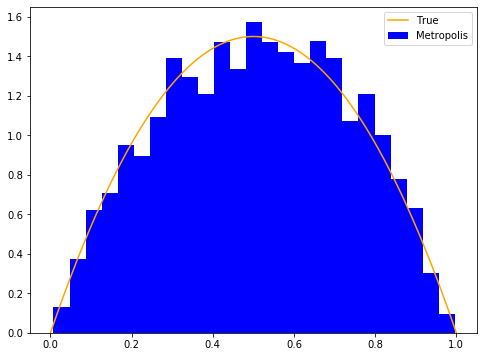

In [48]:
m_3 = Metropolis_3_own(10000,p)
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(m_3[m_3 < 1],bins=25,density=True,color='blue',label = 'Metropolis')
ax.plot(np.linspace(0,1,1000),p(np.linspace(0,1,1000)),color='orange',label = 'True');
plt.legend();

$$ p(x) = cos(x) $$
$$  x \in [0, \pi/3] $$

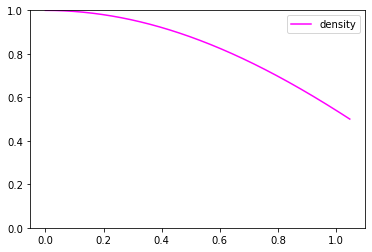

In [50]:
p = lambda x: np.cos(x)
x = np.linspace(0,np.pi/3,1000)
plt.plot(x,p(x),color='magenta',label='density')
plt.legend();
plt.ylim([0,1])
plt.show();

In [148]:
def Metropolis_for_cosinus(p,sample_size):
    
    delta = 0.5
    q = lambda x,y: sps.uniform.pdf(y,loc = x - delta, scale = x + delta)
    x_old = np.random.uniform()
    x_min = 0
    x_max = np.pi/3
    trace = []
    
    for i in tqdm_notebook(range(2*sample_size)):
        
        x_new = sps.uniform(x_old - delta,x_old + delta).rvs(1)
        
        q_x_new_old = q(x_old,x_new)
        q_x_old_new = q(x_new,x_old)
        u = np.random.uniform()
        acceptance = min(1, (p(x_new)*q_x_old_new)/ (p(x_old)*q_x_new_old))
        
        if u < acceptance:
            if x_min < x_new and x_new < x_max:
                x_old = x_new
                if(i >= sample_size):
                    trace.append(x_new)
                else:
                    trace.append(x_old)
        
    return np.array(trace)            

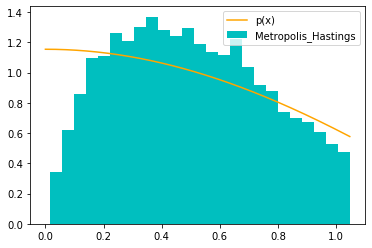

In [153]:
#m = Metropolis_for_cosinus(p,10000)
x = np.linspace(0,np.pi/3,1000)
plt.plot(x,np.cos(x)/np.sin(np.pi/3),color='orange',label=u'p(x)') # normalization
plt.hist(m, bins = 25, density=True, color = 'c',label = 'Metropolis_Hastings')
plt.legend()
plt.show();

In [156]:
def Metropolis_for_cosinus_2(p,sample_size):
    
    sigma = 0.3
    q = lambda x,y: sps.norm.pdf(y,loc = x_old, scale = sigma)
    x_old = np.random.uniform()
    x_min = 0
    x_max = np.pi/3
    trace = []
    
    for i in tqdm_notebook(range(2*sample_size)):
        
        x_new = sps.norm(x_old,sigma).rvs(1)
        
        q_x_new_old = q(x_old,x_new)
        q_x_old_new = q(x_new,x_old)
        u = np.random.uniform()
        acceptance = min(1, (p(x_new)*q_x_old_new)/ (p(x_old)*q_x_new_old))
        
        if u < acceptance:
            if x_min < x_new and x_new < x_max:
                x_old = x_new
                if(i >= sample_size):
                    trace.append(x_new)
                else:
                    trace.append(x_old)
        
    return np.array(trace)            

A Jupyter Widget

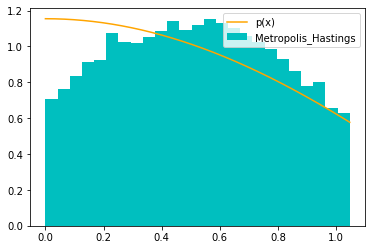

In [157]:
m = Metropolis_for_cosinus_2(p,10000)
x = np.linspace(0,np.pi/3,1000)
plt.plot(x,np.cos(x)/np.sin(np.pi/3),color='orange',label=u'p(x)') # normalization
plt.hist(m, bins = 25, density=True, color = 'c',label = 'Metropolis_Hastings')
plt.legend()
plt.show();

#### 3. First  own Metropolis - Hastings

$$f(x) = \frac{(5x^{10} -3x^{9} - 5x^{5} + x^{3} - x^{2} + 1.5x + 1.6)}{2.4}$$

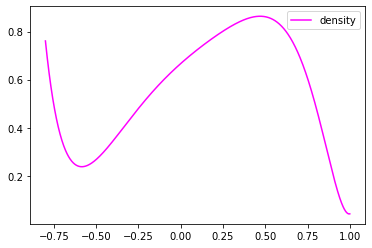

In [107]:
p = lambda x: (5*x**10 -3*x**9 -5*x**5 +x**3 - x**2 +1.5*x + 1.6)/2.4
x = np.linspace(-0.8,1,1000)
plt.plot(x,p(x),color='magenta',label='density')
plt.legend();
plt.show()

In [120]:
def Metropolis_Hast(p, sample_size):
    # we will wait for 70000 iterations 
    # it's like burn in of our chain
    # and final 10000 from 80000 is our sample
    sigma = 1.5 # variance for proposal distribution
    x_min = -0.8
    x_max = 1
    
    # proposal distribution
    q = lambda x,y: sps.norm.pdf(y,loc = x, scale = sigma)
    trace  = []
    x_old = sps.uniform(loc = x_min, scale = x_max).rvs(1)
    
    for i in tqdm_notebook(range(sample_size*8)):
        x_new = np.random.normal(loc = x_old, scale = sigma)# sample new point
        
        q_x_new_x_old = q(x_old,x_new)
        q_x_old_x_new = q(x_new,x_old)
        
        u = sps.uniform(0,1).rvs(1)
        
        acceptance = min(1, (p(x_new)*q_x_old_x_new) / (p(x_old)*q_x_new_x_old) )
        
        if u < acceptance:
            if x_min < x_new and x_new < x_max:
                x_old = x_new
                if(i >= 7*sample_size):
                    trace.append(x_new)
                
                    
            else:
                if(i >= 7*sample_size):
                    trace.append(x_old)
                    
        
    return trace         

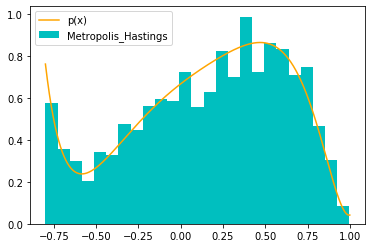

In [123]:
m_4 = Metropolis_Hast(p,10000)
x = np.linspace(-0.8,1,100000)
plt.plot(x,p(x),color='orange',label=u'p(x)')
plt.hist(np.array(m_4), bins = 25, density=True, color = 'c',label = 'Metropolis_Hastings')
plt.legend()
plt.show();

#### 4. Normal Distribution

Right now the next proposal distribution that is defined below and we are going to sample from normal distribution

$$ x^{*} = U(x - \delta,x + \delta)$$

$\delta = 0.5$ is the random walk step

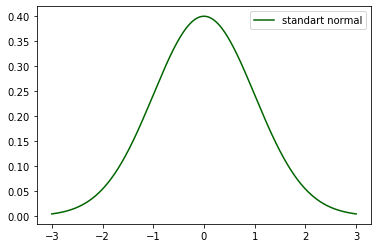

In [125]:
p = lambda x: sps.norm.pdf(x)
x = np.linspace(-3,3,10000)
plt.plot(x,p(x),color='darkgreen',label='standart normal')
plt.legend()
plt.show();

In [144]:
def Metropolis_Hast_2(p, sample_size):
    
    delta = 3
    x_old = np.random.uniform() # mean
    q = lambda x,y: sps.uniform.pdf(y,loc=x - delta,scale = x + delta)
    trace = []
    
    for i in tqdm_notebook(range(sample_size*2)):
        x_new = sps.uniform(loc = x_old - delta, scale = x_old + delta).rvs(1)
        
        q_x_new_old = q(x_old,x_new)
        q_x_old_new = q(x_new,x_old)
        
        u = sps.uniform(0,1).rvs(1)
        acceptance = min(1, (sps.norm.pdf(x_new)*q_x_old_new) / (sps.norm.pdf(x_old)*q_x_new_old))
        
        if u < acceptance:
            x_old = x_new
            if (i >= sample_size):
                trace.append(x_new)
        else:
            if( i >= sample_size):
                trace.append(x_old)
        
        
    return np.array(trace)

A Jupyter Widget

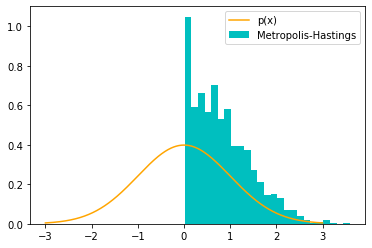

In [145]:
m_5 = Metropolis_Hast_2(p, 10000)
plt.hist(m_5,bins=25,density=True,color='c',label='Metropolis-Hastings')
plt.plot(x,p(x),color='orange',label=u'p(x)')
plt.legend();
plt.show()

#### 5. Multivariate Metropolis-Hastings

#### 5.1 Blockwise  updating

$$ p(x,y) = const * e^{-\frac{x^{2}+y^{2}}{2}} $$

In [159]:
p = lambda x,y: np.exp(-x**2/2.0 - y**2/2.0)

In [188]:
def blockwise_updating(p , sample_size):
    
    x_min,x_max = -2,2
    y_min,y_max = -2,2
    sig_x = 0.1
    sig_y = 0.1
    trace = []
    
    x_old = np.random.normal()
    y_old = np.random.normal()
    
   
    for i in tqdm_notebook(range(2*sample_size)):
        x_new = sps.norm(loc = x_old, scale = sig_x).rvs(1)
        y_new = sps.norm(loc = y_old, scale = sig_y).rvs(1)
        
        Acceptance = min(1, (p(x_new,y_new)) / (p(x_old,y_old) ) )
        
        u = np.random.uniform()
        if u < Acceptance:
            x_old = x_new
            y_old = y_new
            if(i >= sample_size):
                trace.append((x_old,y_old))
        else:
            if(i >= sample_size):
                trace.append((x_old,y_old))
        
    return np.array(trace)

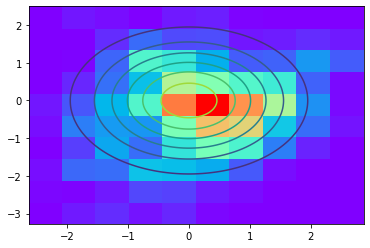

In [214]:
#m_6 = blockwise_updating(p, 10000)
xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))
plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2))
plt.hist2d([float(x[0]) for x in m_6],[float(x[1]) for x in m_6], cmap="rainbow");

In [ ]:
def blockwise_updating_with_proposal():
    ### your code

#### 5.2 Componentwise updating

In [245]:
def componentwise_updating(p, sample_size):
    
    trace_x = []
    trace_y = []
    sigma_x = 1
    sigma_y = 1
    x_old = np.random.normal()
    y_old = np.random.normal()
    
    
    for i in tqdm_notebook(range(2*sample_size)):
        
        u = np.random.uniform()
        
        x_new = sps.norm(loc = x_old,scale = sigma_x).rvs(1)
        Acceptance_x = min(1, p(x_new,y_old)/p(x_old,y_old))
        if u < Acceptance_x:
            x_old = x_new
            if i >= sample_size:
                trace_x.append(x_new)
        else:
            if(i >= sample_size):
                trace_x.append(x_old)
                
                
        y_new = sps.norm(loc = y_old,scale = sigma_y).rvs(1)
        Acceptance_y = min(1, p(x_old,y_new)/p(x_old,y_old))
        if u < Acceptance_y:
            y_old = y_new
            if i >= sample_size:
                trace_y.append(y_new)
        else:
            if(i >= sample_size):
                trace_y.append(y_old)
        
        
    return np.array(trace_x),np.array(trace_y)
                

(-3, 3)

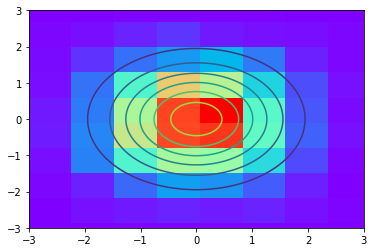

In [252]:
#x,y = componentwise_updating(p, 10000)
xt,yt = np.meshgrid(np.linspace(-3,3, 100),np.linspace(-3,3,100))
plt.contour(xt,yt,  np.exp(-xt**2/2) * np.exp(-yt**2/2))
plt.hist2d([float(a) for a in x],[ float(b) for b in y], cmap="rainbow");
plt.ylim([-3,3])
plt.xlim([-3,3])

In [ ]:
def componentwise_updating_with_proposal():
    ### your code

#### 6. Implementation Metropolis-Hastings